In [50]:
#Importing libraries for analysis
import pandas as pd
import numpy as np

In [51]:
#Importing the csv for chess games and filtering to only rated games
chess_games = pd.read_csv('games.csv')
chess_games = chess_games.loc[(chess_games['rated'] == True)]

In [53]:
#Creating new dataframes for games where white won and black won
white_wins = chess_games.loc[(chess_games['winner'] == 'white')]
black_wins = chess_games.loc[(chess_games['winner'] == 'black')]

Text(0.5, 0, 'Games')

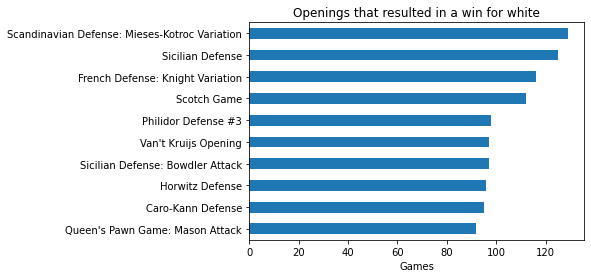

In [54]:
#Creating a graph of white opening wins
ax = white_wins.opening_name.value_counts().nlargest(10).sort_values().plot(kind = 'barh')
ax.title.set_text('Openings that resulted in a win for white')
ax.set_xlabel('Games')

Text(0.5, 0, 'Games')

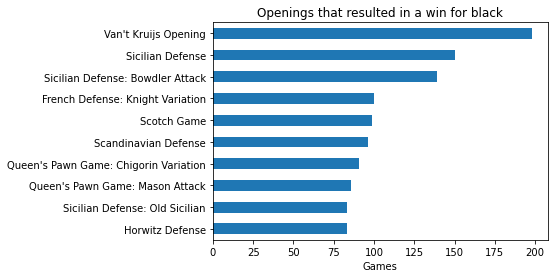

In [55]:
#Creating a graph of black opening wins
ax = black_wins.opening_name.value_counts().nlargest(10).sort_values().plot(kind = 'barh')
ax.title.set_text('Openings that resulted in a win for black')
ax.set_xlabel('Games')

In [56]:
#Adding new tier column in the dataframe based on white ELO rating
#Creating a list of conditions based on ELO ranges
conditions = [
    (chess_games['white_rating'] <= 1200),
    (chess_games['white_rating'] > 1200) & (chess_games['white_rating'] <= 1400),
    (chess_games['white_rating'] > 1400) & (chess_games['white_rating'] <= 1600),
    (chess_games['white_rating'] > 1600) & (chess_games['white_rating'] <= 1800),
    (chess_games['white_rating'] > 1800) & (chess_games['white_rating'] <= 2000),
    (chess_games['white_rating'] > 2000) & (chess_games['white_rating'] <= 2200),
    (chess_games['white_rating'] > 2200) & (chess_games['white_rating'] <= 2300),
    (chess_games['white_rating'] > 2300) & (chess_games['white_rating'] <= 2400),
    (chess_games['white_rating'] > 2400) & (chess_games['white_rating'] <= 2500),
    (chess_games['white_rating'] > 2500) & (chess_games['white_rating'] <= 2700),
    (chess_games['white_rating'] > 2700)
    ]

#Create a list of ELO labels based on the conditions above
values = ['novices', 'class D', 'class C', 'class B', 'class A', 'CM', 'NM', 'FM', 'IM', 'GM', 'super grandmaster']

#Applying the information above to the tier column in the dataframe
chess_games['tier'] = np.select(conditions, values)

In [57]:
#Creating a new dataframe for opening counts to count the different openings by tier
Opening_Counts = chess_games.groupby(['tier']).opening_name.value_counts()

In [58]:
#Creating another new dataframe for openings in order to display the opening names and their counts by tier
Openings = pd.DataFrame(Opening_Counts)
Openings = Openings.rename(columns={"opening_name": "opening_counts"})
Openings = Openings.reset_index()
idx = Openings.groupby(['tier'])['opening_counts'].transform(max) == Openings['opening_counts']
Openings[idx]

,tier,opening_name,opening_counts
0,CM,Sicilian Defense,12
510,FM,Giuoco Piano,2
511,FM,Latvian Gambit Accepted | Main Line,2
512,FM,Nimzo-Indian Defense: Panov Attack | Main Line,2
513,FM,Queen's Pawn Game: Zukertort Variation,2
514,FM,Saragossa Opening,2
515,FM,Sicilian Defense: Closed #2,2
516,FM,Sicilian Defense: Delayed Alapin,2
572,GM,King's Indian Attack: Symmetrical Defense,1
573,GM,Nimzowitsch Defense | Declined Variation,1


In [59]:
#Splitting off the time and increment columns in the dataset so that we can get with the time constraints were for each game
chess_games[['Time', 'Increment']] = chess_games['increment_code'].str.split('+', 1, expand=True)
chess_games['Time'] = chess_games['Time'].astype('int64')

In [60]:
#Based on the game time we will assign the game type to each game

conditions = [
    (chess_games['Time'] < 3),
    (chess_games['Time'] >= 3) & (chess_games['Time'] < 10),
    (chess_games['Time'] >= 10)]
    
value = ['bullet', 'blitz', 'rapid']

#Creating a new column game type and applying the above information to the dataframe
chess_games['Game Type'] = np.select(conditions, value)

In [61]:
#Creating a dataframe of game openings count grouping by game type to display the most common openings
Game_Openings_Count = chess_games.groupby(['Game Type']).opening_name.value_counts()
Game_Openings = pd.DataFrame(Game_Openings_Count)
Game_Openings = Game_Openings.rename(columns={"opening_name": "Game_Openings_Count"})
Game_Openings = Game_Openings.reset_index()
idx = Game_Openings.groupby(['Game Type'])['Game_Openings_Count'].transform(max) == Game_Openings['Game_Openings_Count']
Game_Openings[idx]

,Game Type,opening_name,Game_Openings_Count
0,blitz,Van't Kruijs Opening,86
717,bullet,Scandinavian Defense,7
792,rapid,Sicilian Defense,237


In [62]:
#Creating separate dataframes for white and black wins grouping each dataframe by player id and summing the counts
White_winning_count = chess_games.groupby(['white_id']).winner.value_counts()
White_winning = pd.DataFrame(White_winning_count)
White_winning = White_winning.rename(columns={"winner": "white_winning count", "white_id": "player_id"})
White_winning = White_winning.reset_index()
White_winning = White_winning.loc[White_winning['winner'] == 'white']
White_winning = White_winning.rename(columns={"white_id": "player_id", "winner": "white_wins"})
Black_winning_count = chess_games.groupby(['black_id']).winner.value_counts()
Black_winning = pd.DataFrame(Black_winning_count)
Black_winning = Black_winning.rename(columns={"winner": "black_winning count", "black_id": "player_id"})
Black_winning = Black_winning.reset_index()
Black_winning = Black_winning.loc[Black_winning['winner'] == 'black']
Black_winning = Black_winning.rename(columns={"black_id": "player_id", "winner": "black_wins"})

In [63]:
#Joining the two dataframes together for white and black wins based on player id
Combined_Wins = White_winning.join(Black_winning.set_index('player_id'), on='player_id', how='outer')

In [64]:
#Filling in 0's for entries where one player had won only games with white or black
Combined_Wins["white_winning count"] = Combined_Wins["white_winning count"].fillna(0)
Combined_Wins["black_winning count"] = Combined_Wins["black_winning count"].fillna(0)

In [65]:
#Summing the wins of white winning and black winning column and totalling up the wins
Combined_Wins["Total Wins"] = Combined_Wins["white_winning count"] + Combined_Wins["black_winning count"]

In [66]:
#Creating a new dataframe of top wins and getting the player with the most total wins
Top_Wins = Combined_Wins.sort_values("Total Wins", ascending=False).head(1)
Top_Player = Top_Wins["player_id"].values[0]
Top_Wins

,player_id,white_wins,white_winning count,black_wins,black_winning count,Total Wins
8597.0,vladimir-kramnik-1,white,22.0,black,28.0,50.0


In [67]:
#Creating a new dataframe of most wins which will pull the games for the top win player
Most_Wins = chess_games[(chess_games["white_id"]==Top_Player) & (chess_games["winner"]=="white") | 
                       (chess_games["black_id"]==Top_Player) & (chess_games["winner"]=="black")]

Text(0.5, 0, 'Games')

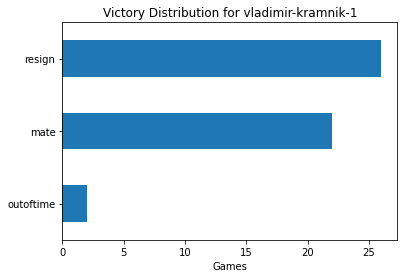

In [68]:
#Creating a plot to show victory distribution for the top player
ax = Most_Wins.victory_status.value_counts().sort_values().plot(kind = 'barh')
ax.title.set_text('Victory Distribution for %s' %Top_Player)
ax.set_xlabel('Games')